# Lending Club Case Study

###### The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

## Data Understanding

### To be done at the last

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading data from loan CSV

In [2]:
loan_df = pd.read_csv('loan.csv')
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning and Manipulation

### Checking for null values in the dataset

In [3]:
loan_df.isna().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

###### There are a lot of empty columns in the loan dataset. Dropping those columns from the dataset and then checking the dataset shape

In [4]:
loan_df.dropna(axis = 1, how = 'all', inplace = True)
loan_df.shape

(39717, 57)

### Checking for unique values

##### If the column has only a single unique value, it does not make any sense to include it as part of our data analysis. We need to find out those columns and drop them from the dataset

In [5]:
remove_columns_list = []
for i in loan_df.columns:
    # Check if unique value count is 1
    if loan_df[i].nunique() == 1:
        remove_columns_list.append(i)
    

# Remove those columns
loan_df.drop(remove_columns_list, axis = 1, inplace = True)

In [6]:
loan_df.shape

(39717, 48)

### Checking for duplicated rows in data

In [7]:
loan_df[loan_df.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies


###### There is no duplicate row found

### Dropping columns where loan_status = 'Current'

###### The loan in progress cannot provide us insights as to whether the borrower is likely to default or not. Hence, dropping those columns

In [8]:
loan_df = loan_df[loan_df['loan_status'].str.lower() != "current"]
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,NaN


### Dropping columns where missing data is more than equal to 65%

###### These columns will skew our data analysis and they need to be removed

In [9]:
for col in loan_df.columns:
    missing_values = round(loan_df[col].isna().sum() / loan_df.shape[0], 2)
    if missing_values >= 0.65:
        loan_df.drop(col, axis = 1, inplace = True)
        
loan_df.shape

(38577, 45)

### Dropping columns containing text like desc, emp_title, id, member_id, title, url, zip_code

###### These will not contribute to loan pass or fail

In [10]:
# loan_df.drop(['desc', 'emp_title', 'id', 'member_id', 'title', 'url', 'zip_code'], axis = 1, inplace = True)
# loan_df.shape

In [11]:
# List the coumns which are not required for the analysis. Total 27 columns
drop_cols = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d', 'desc', 'emp_title', 'id', 'member_id', 'title', 'url', 'zip_code']

loan_df.drop(drop_cols, axis = 1, inplace = True)

In [12]:
loan_df.shape

(38577, 18)

### Common Functions

In [77]:
def plot_bar_graph(df: pd.DataFrame, column_name: str) -> None:
    """
    Create a bar graph for a specified column in a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to be plotted.

    Returns:
        None
    """
    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    frequency = df[column_name].value_counts()

    plt.figure(figsize=(10, 10))
    sns.barplot(x=frequency.index, y=frequency.values, palette="muted")
    
    for i, count in enumerate(frequency.values):
        plt.text(i, count + 1.5, str(count), ha='center', va='bottom', fontsize=12, rotation=90)

    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Bar Plot of {column_name}', fontsize=14)

    plt.xticks(rotation=90)
    plt.show()


In [13]:
def plot_cross_tab_graph_for_defaulters(df: pd.DataFrame, defaulter_dict: dict) -> None:
    """
    Function to plot cross tabulation graph for loan defaulters (charged-off) against driver variables for default
    For instance, purpose for taking a loan.

    Args:
        df: Input Dataframe having loan status details
        defaulter_dict: Dictionary having keys representing configuration of Default Drivers along with plot configurations

    Returns:
        Seaborn Count plot with frequency annotations of default driver variables
    """

    fig = plt.figure(1, figsize=(defaulter_dict['figsize_x'], defaulter_dict['figsize_y']))
    ax = sns.countplot(data=df[df.loan_status == 'Charged Off'], y = defaulter_dict['default_driver'])

    for p in ax.patches:
            ax.annotate(
                int(p.get_width()),
                ((p.get_x() + p.get_width()), p.get_y()),
                xytext=defaulter_dict['xytext'],
                fontsize=14,
                color='#d00436',
                textcoords='offset points',
                horizontalalignment='right'
            )

    plt.xlabel(
        defaulter_dict['xlabel'],
        fontsize=14,
        fontweight='bold'
    )

    plt.ylabel(
        defaulter_dict['ylabel'],
        fontsize=14,
        fontweight='bold'
    )

    plt.title(
        defaulter_dict['title'],
        color='red',
        fontsize=24,
        fontweight='bold',
        y=1.05
    )

    plt.show()

In [81]:
def calculate_boxplot_stats(df: pd.DataFrame, column: str, iqr_multiplier: float = 1.5) -> dict:
    """
    Calculate the Interquartile Range (IQR) and the lower and upper bounds for outlier detection.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column for which to calculate the IQR and bounds.
        iqr_multiplier (float, optional): Multiplier for the IQR to determine bounds. Default is 1.5.

    Returns:
        dict: A dictionary containing the following values:
            - 'quartile1': The first quartile (25th percentile).
            - 'quartile3': The third quartile (75th percentile).
            - 'iqr': The Interquartile Range (IQR).
            - 'lower_bound': The lower bound for outlier detection.
            - 'upper_bound': The upper bound for outlier detection.
    """
    quartile1 = df[column].quantile(0.25)
    quartile3 = df[column].quantile(0.75)
    iqr = quartile3 - quartile1
    lower_bound = quartile1 - iqr_multiplier * iqr
    upper_bound = quartile3 + iqr_multiplier * iqr
    return {
        'quartile1': quartile1,
        'quartile3': quartile3,
        'iqr': iqr,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }


In [93]:
def create_boxplot(df: pd.DataFrame, column_name: str, title: str = None, horizontal: bool = True) -> None:
    """
    Create a box plot for a specified column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to be plotted.
        title (str, optional): The title of the plot. Default is None.
        orient (str): The orientation of the plot. Default is horizontal. Possible values - h, v.

    Returns:
        None
    """

    if column_name not in df.columns:
        print(f"Error: Column '{column_name}' not found in the DataFrame.")
        return

    plt.figure(figsize=(8, 6))
    if horizontal:
        sns.boxplot(y=df[column_name], orient='h', palette='Set2')
    else:
        sns.boxplot(x=df[column_name], orient='v', palette='Set2')

    if title:
        plt.title(title)

    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.show()


### Data Conversion

### Sorting the dataframe columns in ascending order to address columns alphabetically

In [14]:
loan_df = loan_df.reindex(sorted(loan_df.columns), axis=1)
loan_df

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
0,AZ,24000.0,27.65,10+ years,5000,4975.0,B,RENT,162.87,10.65%,Dec-11,5000,Fully Paid,0.0,credit_card,B2,36 months,Verified
1,GA,30000.0,1.00,< 1 year,2500,2500.0,C,RENT,59.83,15.27%,Dec-11,2500,Charged Off,0.0,car,C4,60 months,Source Verified
2,IL,12252.0,8.72,10+ years,2400,2400.0,C,RENT,84.33,15.96%,Dec-11,2400,Fully Paid,0.0,small_business,C5,36 months,Not Verified
3,CA,49200.0,20.00,10+ years,10000,10000.0,C,RENT,339.31,13.49%,Dec-11,10000,Fully Paid,0.0,other,C1,36 months,Source Verified
5,AZ,36000.0,11.20,3 years,5000,5000.0,A,RENT,156.46,7.90%,Dec-11,5000,Fully Paid,0.0,wedding,A4,36 months,Source Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,CO,110000.0,11.33,4 years,2500,1075.0,A,MORTGAGE,78.42,8.07%,Jul-07,2500,Fully Paid,NaN,home_improvement,A4,36 months,Not Verified
39713,NC,18000.0,6.40,3 years,8500,875.0,C,RENT,275.38,10.28%,Jul-07,8500,Fully Paid,NaN,credit_card,C1,36 months,Not Verified
39714,MA,100000.0,2.30,< 1 year,5000,1325.0,A,MORTGAGE,156.84,8.07%,Jul-07,5000,Fully Paid,NaN,debt_consolidation,A4,36 months,Not Verified
39715,MD,200000.0,3.72,< 1 year,5000,650.0,A,MORTGAGE,155.38,7.43%,Jul-07,5000,Fully Paid,NaN,other,A2,36 months,Not Verified


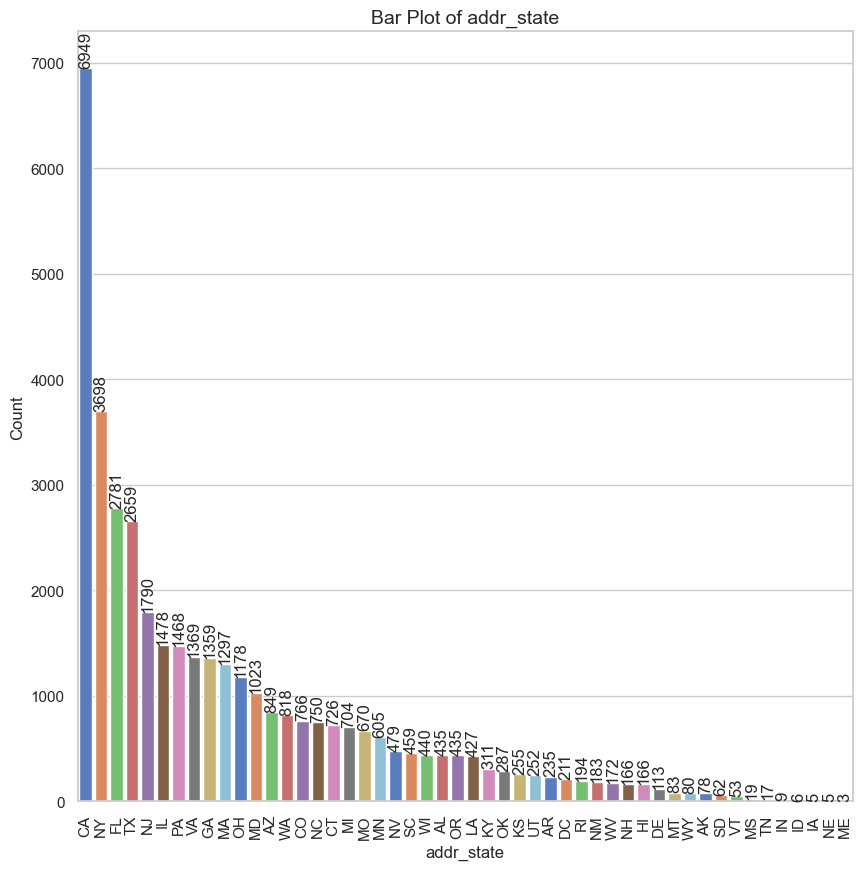

In [78]:
plot_bar_graph(loan_df, 'addr_state')

In [16]:
loan_df.annual_inc.value_counts().sort_index(ascending=False)

6000000.0    1
3900000.0    1
2039784.0    1
1900000.0    1
1782000.0    1
            ..
4888.0       1
4800.0       4
4200.0       2
4080.0       1
4000.0       1
Name: annual_inc, Length: 5215, dtype: int64

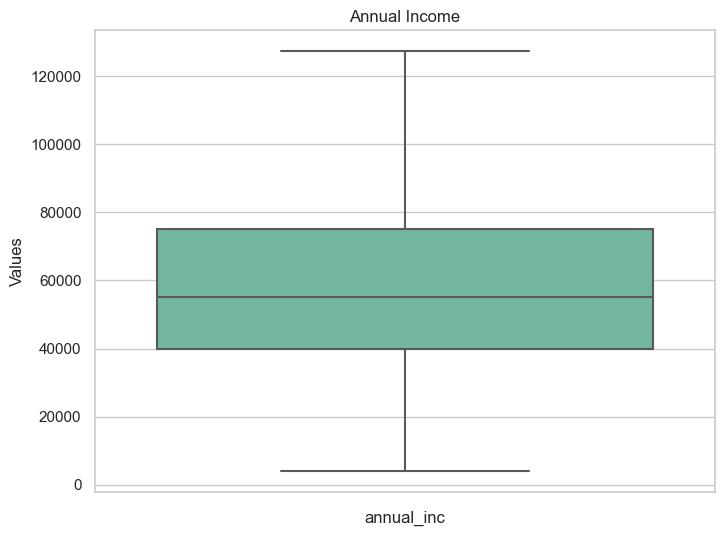

In [95]:
is_annual_inc_lb = calculate_boxplot_stats(loan_df, 'annual_inc')['lower_bound']
is_annual_inc_ub = calculate_boxplot_stats(loan_df, 'annual_inc')['upper_bound']
is_annual_inc_lt = loan_df.annual_inc > is_annual_inc_lb
is_annual_inc_gt = loan_df.annual_inc < is_annual_inc_ub
req_income = is_annual_inc_lt & is_annual_inc_gt
loan_df = loan_df[req_income]
create_boxplot(loan_df, 'annual_inc', title='Annual Income')

In [96]:
loan_df

,addr_state,annual_inc,dti,emp_length,funded_amnt,funded_amnt_inv,grade,home_ownership,installment,int_rate,issue_d,loan_amnt,loan_status,pub_rec_bankruptcies,purpose,sub_grade,term,verification_status
0,AZ,24000.0,27.65,10+ years,5000.0,4975.0,B,RENT,162.87,10.65%,Dec-11,5000.0,Fully Paid,0.0,credit_card,B2,36 months,Verified
1,GA,30000.0,1.00,< 1 year,2500.0,2500.0,C,RENT,59.83,15.27%,Dec-11,2500.0,Charged Off,0.0,car,C4,60 months,Source Verified
2,IL,12252.0,8.72,10+ years,2400.0,2400.0,C,RENT,84.33,15.96%,Dec-11,2400.0,Fully Paid,0.0,small_business,C5,36 months,Not Verified
3,CA,49200.0,20.00,10+ years,10000.0,10000.0,C,RENT,339.31,13.49%,Dec-11,10000.0,Fully Paid,0.0,other,C1,36 months,Source Verified
5,AZ,36000.0,11.20,3 years,5000.0,5000.0,A,RENT,156.46,7.90%,Dec-11,5000.0,Fully Paid,0.0,wedding,A4,36 months,Source Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,CO,75000.0,15.55,5 years,5000.0,700.0,B,MORTGAGE,158.30,8.70%,Jul-07,5000.0,Fully Paid,NaN,credit_card,B1,36 months,Not Verified
39712,CO,110000.0,11.33,4 years,2500.0,1075.0,A,MORTGAGE,78.42,8.07%,Jul-07,2500.0,Fully Paid,NaN,home_improvement,A4,36 months,Not Verified
39713,NC,18000.0,6.40,3 years,8500.0,875.0,C,RENT,275.38,10.28%,Jul-07,8500.0,Fully Paid,NaN,credit_card,C1,36 months,Not Verified
39714,MA,100000.0,2.30,< 1 year,5000.0,1325.0,A,MORTGAGE,156.84,8.07%,Jul-07,5000.0,Fully Paid,NaN,debt_consolidation,A4,36 months,Not Verified


###### Convert funded amount (funded_amnt) and loan amount (loan_amnt) to float to match the data

In [20]:
loan_df = loan_df.astype({ 'funded_amnt' : 'float', 'loan_amnt' : 'float' })

In [21]:
loan_df.emp_length.isna().sum()

1033

###### Employment length has 1033 missing values, which means either they are not employed or self-employed (business owners). Considering they have a decent annual income, we have assumed that these are business owners and we have added their employment duration with the mode value of emp_length which is 10+ years

In [22]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)

In [23]:
loan_df.emp_length.isna().sum()

0

<Axes: >

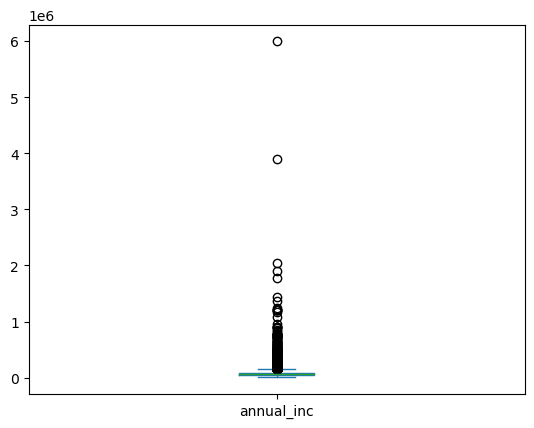

In [24]:
loan_df.annual_inc.plot.box()

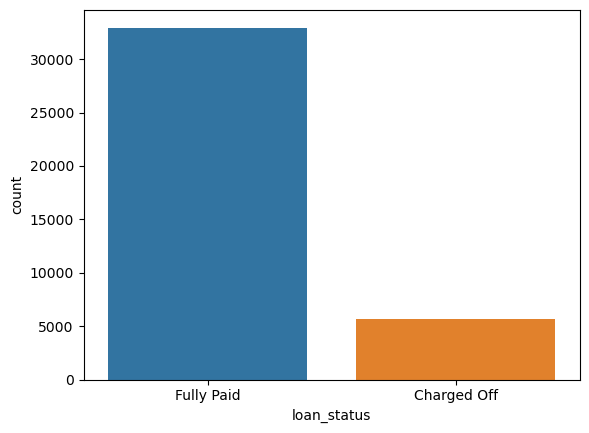

In [25]:
ax = sns.countplot(data = loan_df, x = 'loan_status')
plt.show()

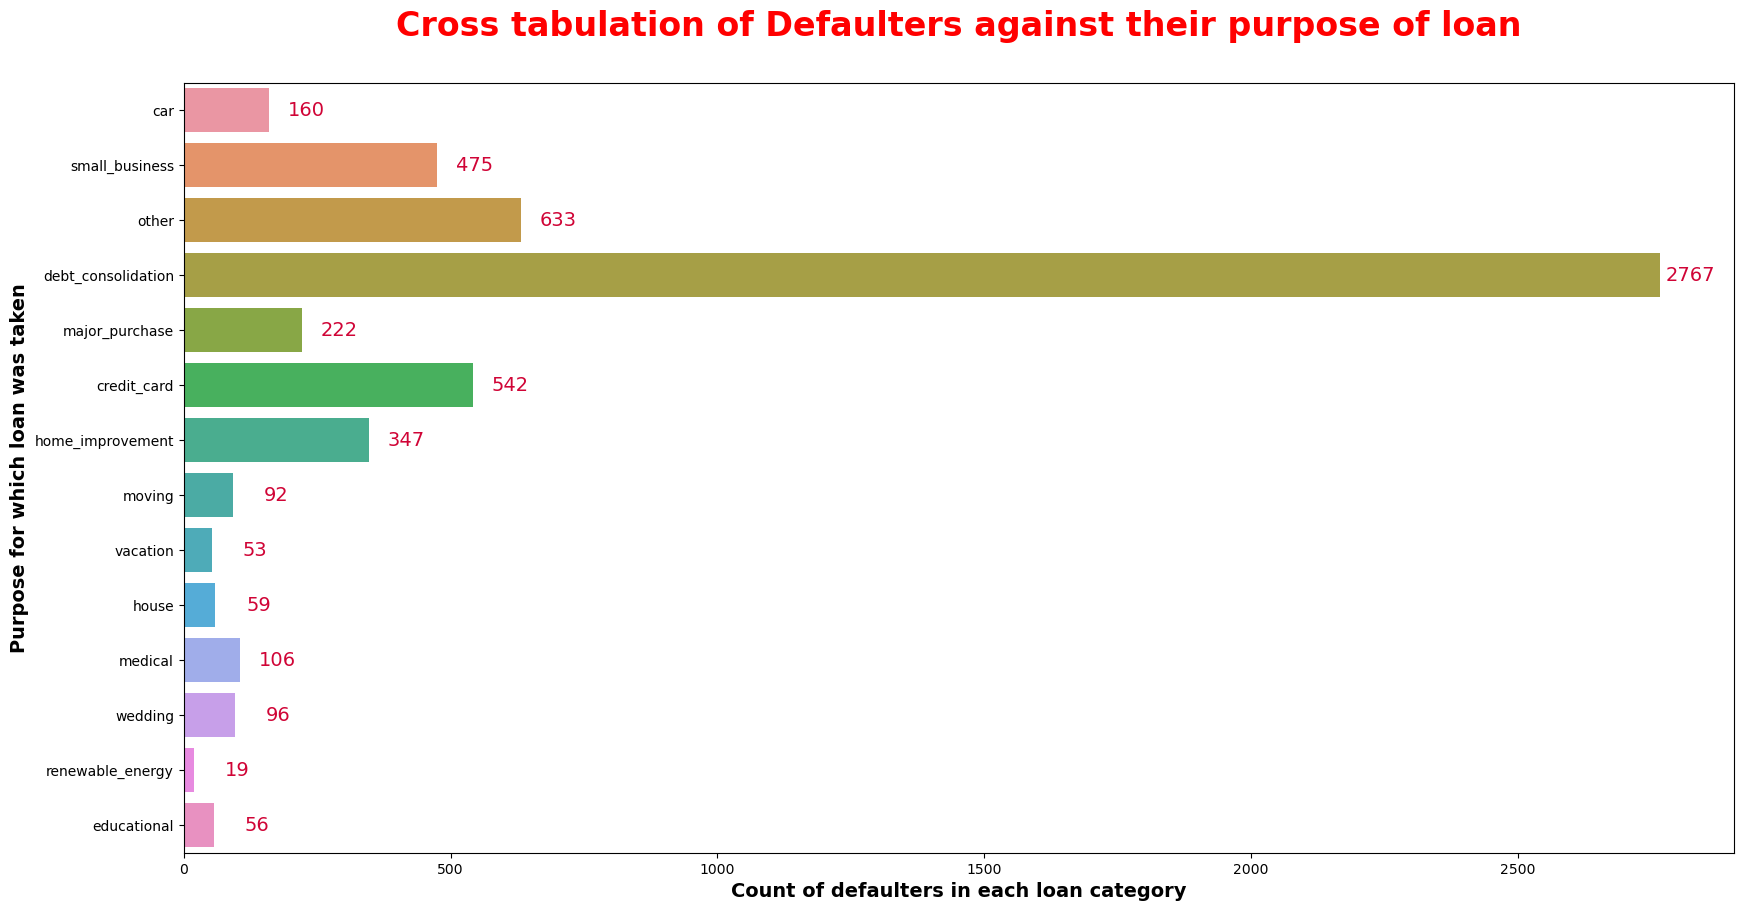

In [26]:
purpose_dict = dict(
    default_driver='purpose',
    figsize_x=20,
    figsize_y=10,
    xlabel='Count of defaulters in each loan category',
    ylabel='Purpose for which loan was taken',
    xytext=(40, -20),
    title='Cross tabulation of Defaulters against their purpose of loan'
)

plot_cross_tab_graph_for_defaulters(loan_df, purpose_dict)


## Address State of Loan Defaulters

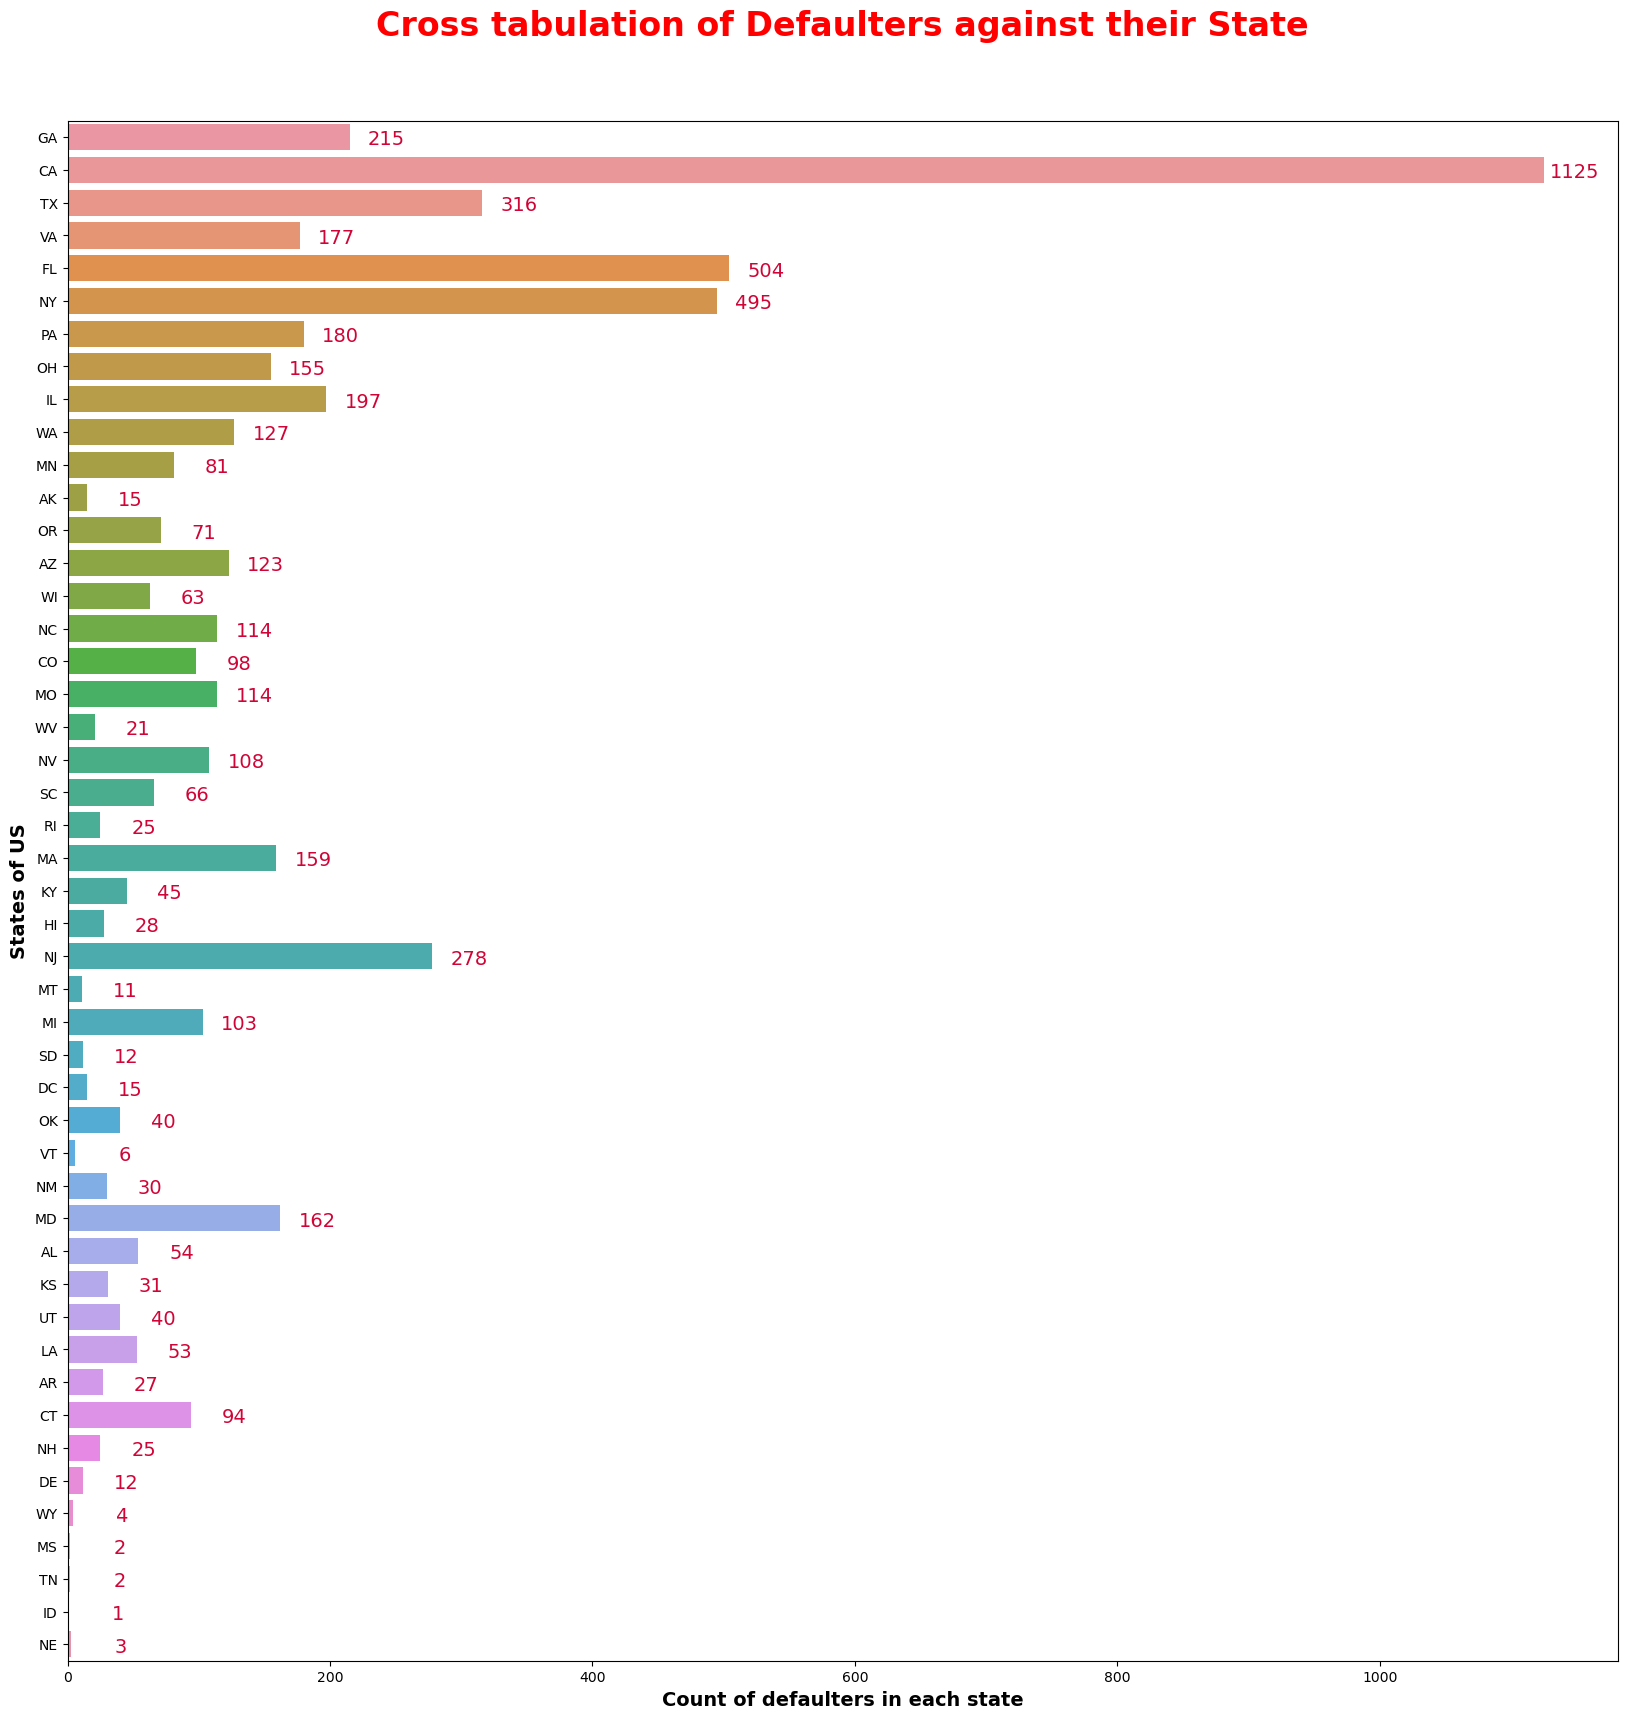

In [27]:
address_state_dict = dict(
    default_driver='addr_state',
    figsize_x=20,
    figsize_y=20,
    xlabel='Count of defaulters in each state',
    ylabel='States of US',
    xytext=(40, -15),
    title='Cross tabulation of Defaulters against their State'
)

plot_cross_tab_graph_for_defaulters(loan_df, address_state_dict)
